# Contents

1. Introduction
2. Problem Statement
3. Data Understanding
4. Data Cleaning
5. Exploratory Data Analysis
6. Train-test Split 
7. Feature Engineering
8. Model Build - Handling Imbalanced Classes
9. Model Evaluation
10. Conclusion
11. Cost Analysis

# 1. Introduction

Detect Fraudulent Credit Card transactions using different Machine Learning models and compare performances

In this notebook, I explore various Machine Learning models to detect fraudulent use of Credit cards. I compare each model performance and results. 

Please note that this approach can be transferred to other detection analysis in alternatrive domains. The feature extraction process remains similar and can be replicated on many other detection issues.

# 2. Problem Statement

Fraudulent activities percolate across industries and business lines, and affect almost every enterprise and individual. Such activities could be described as business transactions that are perpetrated by malicious entities that appear genuine.

 
A 2019 report by the University of Portsmouth estimates that globally, the losses caused due to frauds equate to roughly 6% of the entire world’s GDP, or around $5.127 trillion. An enterprise could face around 3–6% of losses due to fraud, with the highest losses amounting to 10% of the revenue.

 
Enterprises are being severely affected by fraudsters. Losses owing to fraud have increased from an average of 4.57% in the global recession phase of 2007–2008 to 7.15% in 2017–2018. This is a staggering growth of 56.5% in a period of 10 years.

# 3. Data Understanding

In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Train Test Split
from sklearn.model_selection import train_test_split

# Logistic Regression
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import r2_score 

#ROC Curve
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler

# Tomek Links
from imblearn.under_sampling import TomekLinks

# Random OverSampling
from imblearn.over_sampling import RandomOverSampler

# SMOTE
from imblearn.over_sampling import SMOTE

# ADASYN
from imblearn.over_sampling import ADASYN

# SMOTE+TOMEK
from imblearn.combine import SMOTETomek

# Decision Trees - Base/ Random UnderSampling/ Tomek Links/ Random Over-Sampling/ SMOTE/ ADASYN/ SMOTE+TOMEK
# from sklearn.tree import DecisionTreeClassifier

#KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier

# Random Forest - Base
from sklearn.ensemble import RandomForestClassifier

#Random Forest Hyper Parameter
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

The dataset has 2.8Laks credit card transactions. Time duration after the last transaction, transaction amount and another 28 variables is captured after applying PCA to reducde the dimension of the data for model generation and analysis purpose

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Shape of the Credit card dataframe
df.shape

(284807, 31)

In [4]:
df_copy = df.copy()

In [5]:
#Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#Data Information 
df.describe(percentiles=[.25,.5,.75,.90,.99])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
90%,157640.400000,2.015409e+00,1.326635e+00,1.676173e+00,1.482807e+00,1.407893e+00,1.509365e+00,1.039387e+00,7.693811e-01,1.301671e+00,...,3.761555e-01,9.148826e-01,3.392860e-01,7.054036e-01,6.009027e-01,6.889469e-01,2.653679e-01,1.799362e-01,203.000000,0.000000
99%,170560.940000,2.237130e+00,3.801811e+00,2.728434e+00,4.248032e+00,3.424903e+00,4.200085e+00,2.696205e+00,2.075973e+00,2.986773e+00,...,1.931852e+00,1.530152e+00,1.508703e+00,1.063748e+00,1.203955e+00,1.158698e+00,9.313604e-01,5.411264e-01,1017.970000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# 4. Data Cleaning

In [7]:
#Check for null values
df.isnull().sum().sum()

0

In [8]:
#Duplicate Check
df.drop_duplicates(subset=None,inplace=True)
df.shape

(283726, 31)

### There are 1081 duplicate records

# 5. Exploratory Data Analysis

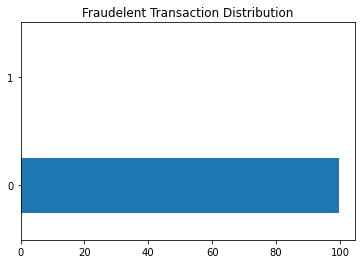

In [9]:
#Validate target variable distribution
(df.Class.value_counts(normalize=True)*100).plot.barh()
plt.title('Fraudelent Transaction Distribution')
plt.show()

In [10]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


### More than 99% data is non-fraudelent category, so this dataset is highly imbalanced 

Most of the transactions are non-fraud. If we use this dataframe as the base for predictive models and analyse, we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### V1-V28 is already transformed using principal componenet analysis (PCA), so only non-transformed variables are:

 Time
 
 Amount
 
 Class (1: fraud, 0: not_fraud)



In [12]:
Fraud = df[df.Class==1]
Not_fraud = df[df.Class==0]

In [13]:
# Distribution of Amount on target variable
pd.concat([Fraud.Amount.describe(),Not_fraud.Amount.describe()], axis=1)

,Amount,Amount
count,473.000000,283253.000000
mean,123.871860,88.413575
std,260.211041,250.379023
min,0.000000,0.000000
25%,1.000000,5.670000
50%,9.820000,22.000000
75%,105.890000,77.460000
max,2125.870000,25691.160000


Fraud transactions have huge difference between 25 50 or 75 percentile

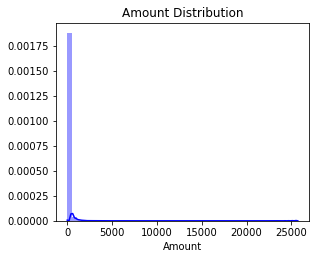

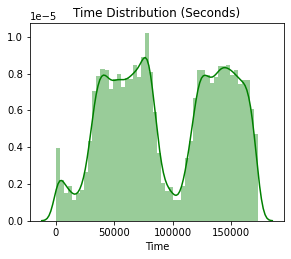

In [14]:
# Distribution of Amount on target variable
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title('Amount Distribution')

sns.distplot(df.Amount, color='Blue');

# Distribution of Time on target variable
plt.figure(figsize=(10,8))

plt.subplot(2,2,2)
plt.title('Time Distribution (Seconds)')

sns.distplot(df.Time, color='Green');



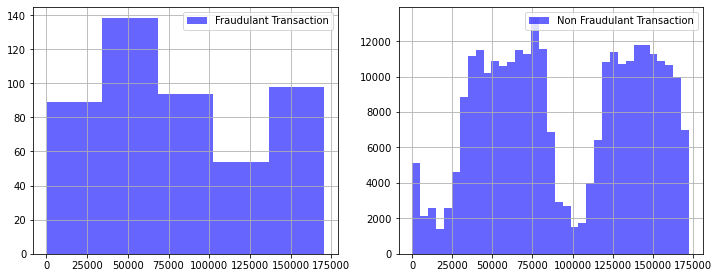

In [15]:
#Time Distribution based on target variable
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df[df.Class==1].Time.hist(bins=5, color='blue',  alpha=0.6,label="Fraudulant Transaction", histtype='stepfilled')
plt.legend()

plt.subplot(2, 2, 2)
df[df.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

plt.show()

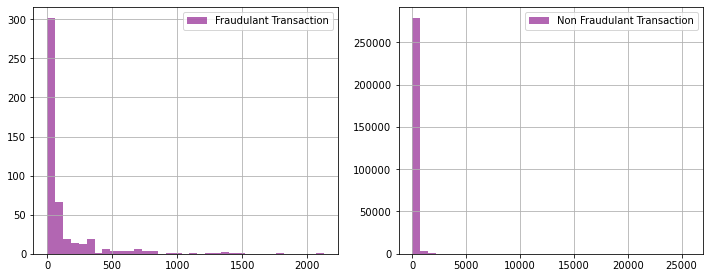

In [16]:
#Amount Distribution based on target variable
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df[df.Class == 1].Amount.hist(bins=35, color='purple', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
df[df.Class == 0].Amount.hist(bins=35, color='purple', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()
plt.show()

By seeing the distributions we can have an idea how skewed are these features, we will take look on other features distribution later. 
But, as of now transaction time parameter doesnot really matter based on above observations

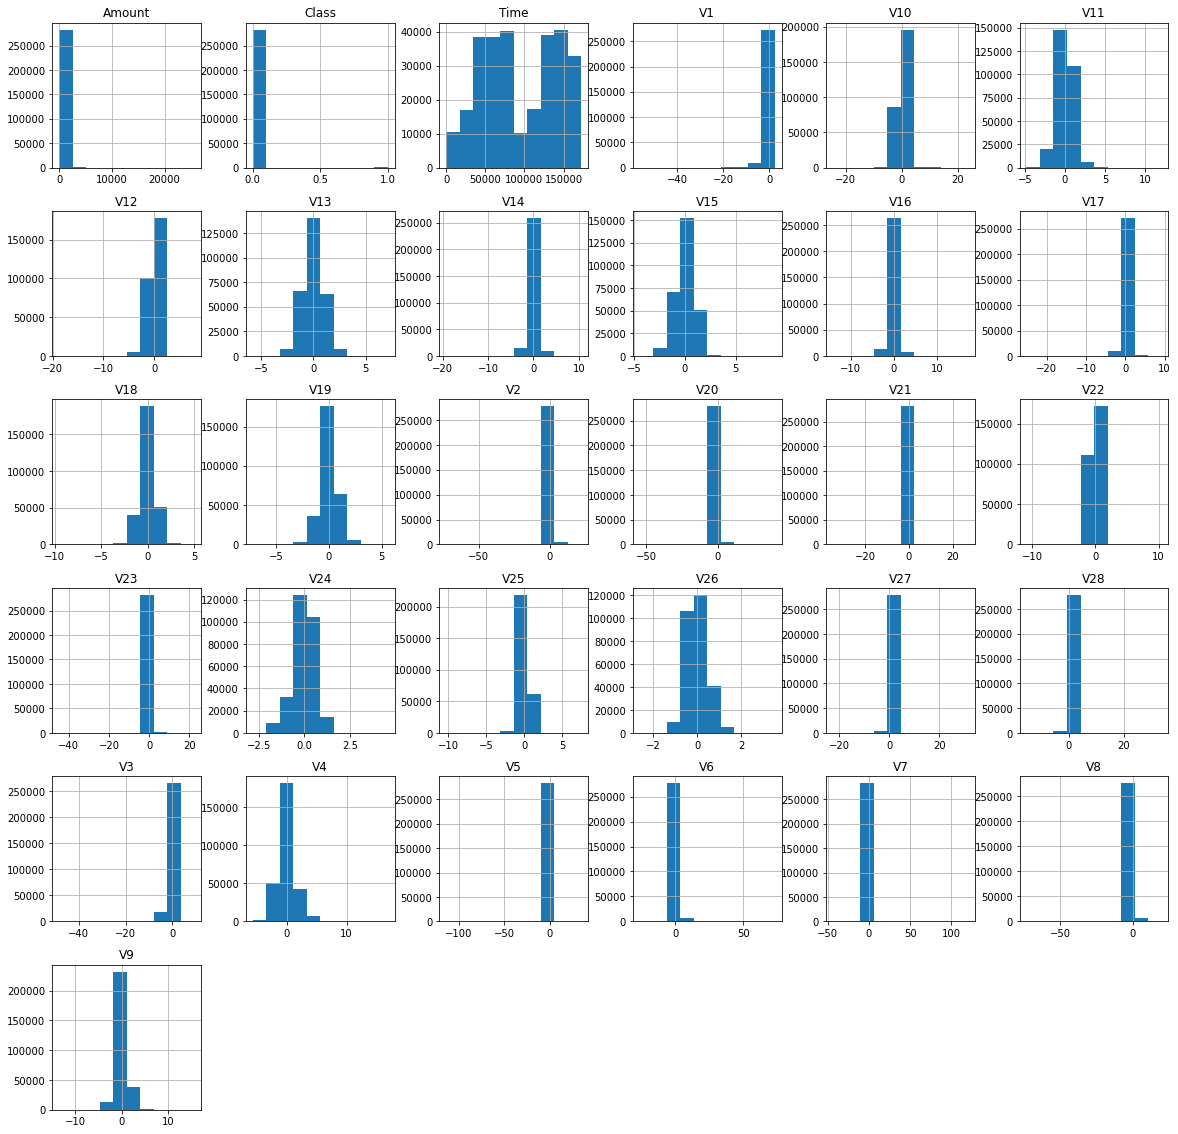

In [17]:
df.hist(figsize=(20,20))
plt.show()

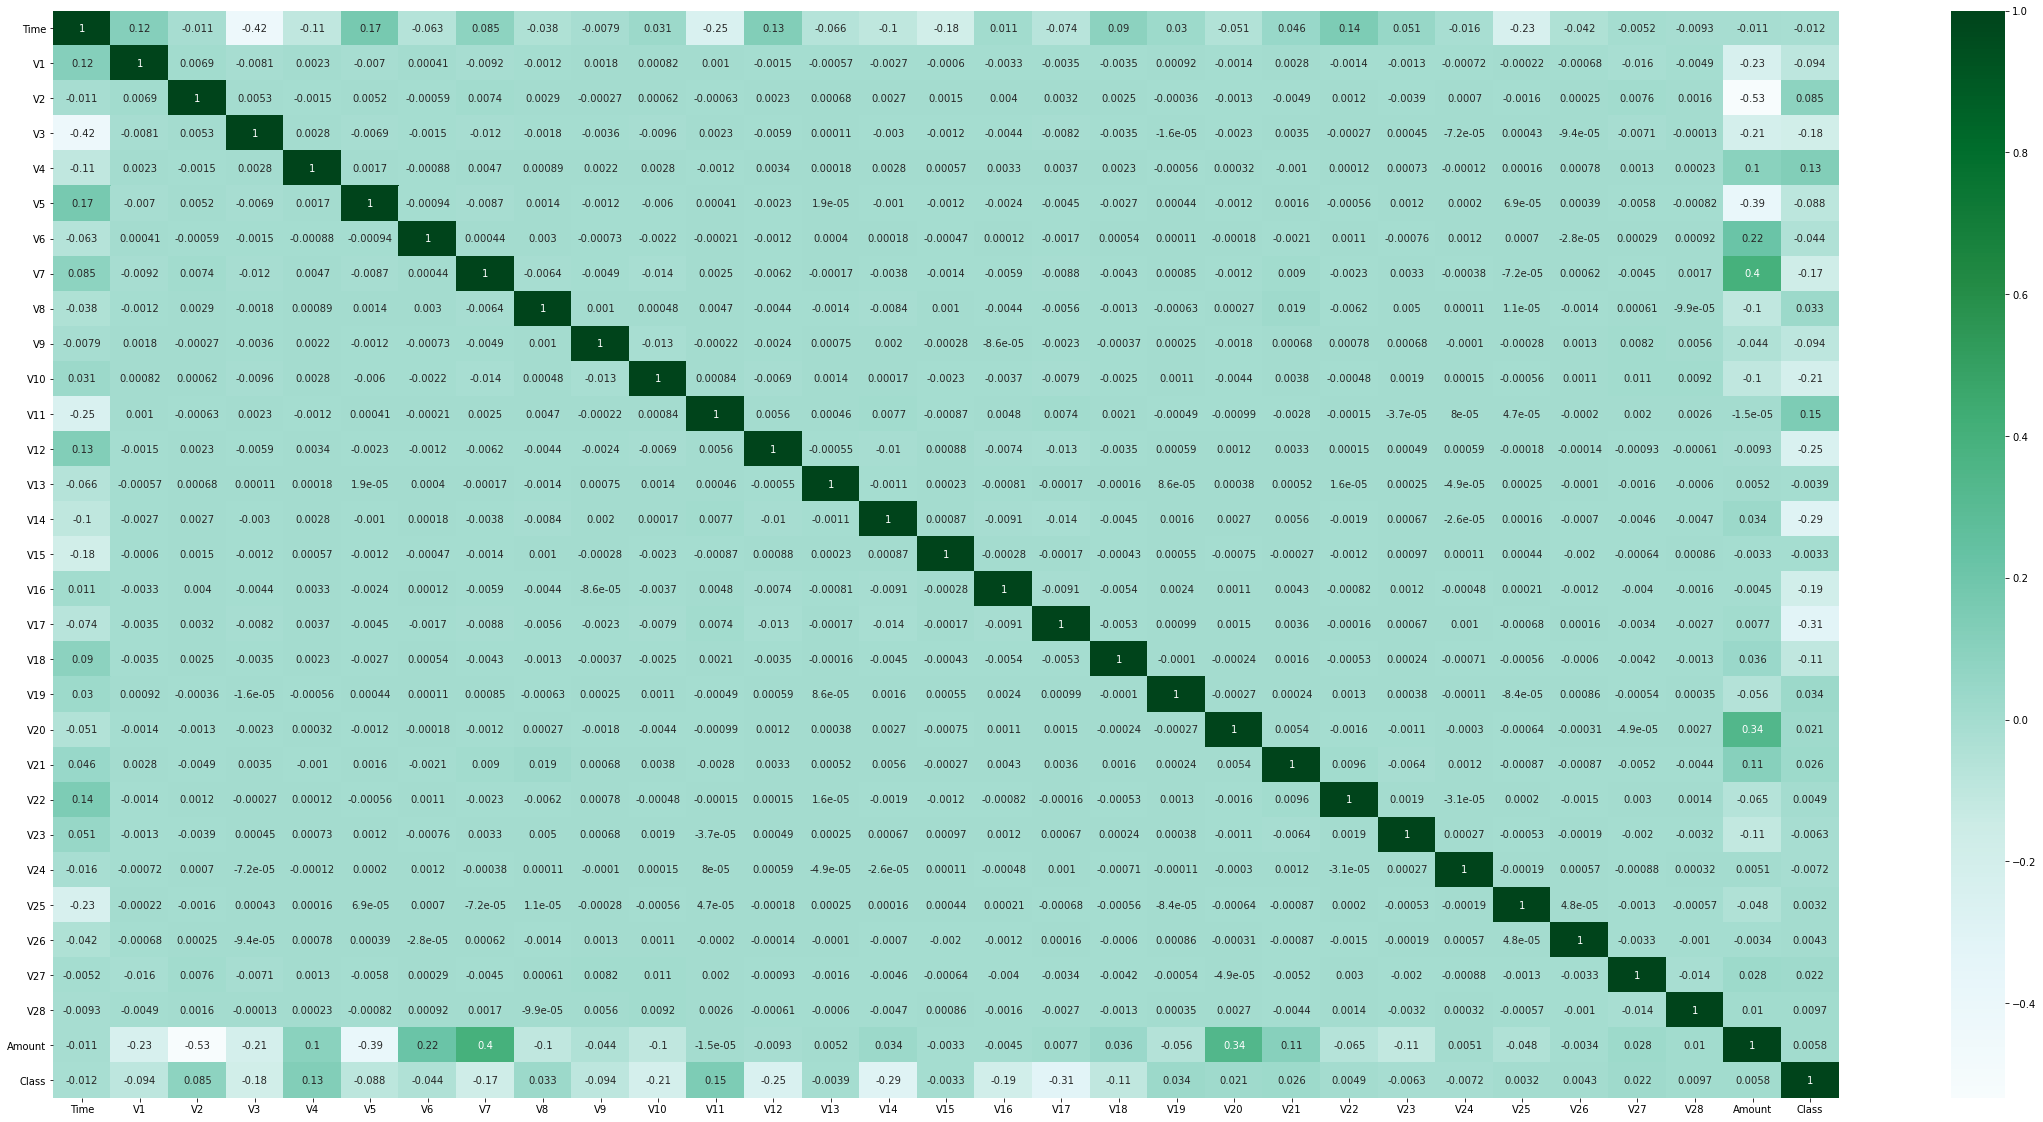

In [18]:
#Let`s see the corelation matrix
plt.figure(figsize=(40,20))
# sns.heatmap(df.corr(),annot=True, cmap="tab20c")
sns.heatmap(df.corr(),annot=True, cmap='BuGn')
plt.show()

## Highest correlations come from:¶

- Time & V3 (-0.42)
- Amount & V2 (-0.53)
- Amount & V5 (-0.4)




### Note

    While these correlations are high, I don't expect it to run the risk of multicollinearity.

    The correlation matrix shows also that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.



In [19]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [20]:
#Outlier Treatment
df.describe(percentiles = [0.25,0.5,0.75,0.9,0.95,.99])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
90%,157631.000000,2.015767,1.319481,1.675647,1.479222,1.406942,1.507018,1.039029,0.765175,1.300125,...,0.376136,0.914943,0.339283,0.705664,0.600707,0.689385,0.265428,0.179793,203.380000,0.000000
95%,164138.750000,2.081438,1.796086,2.062083,2.556595,2.099693,3.159414,1.407143,1.042342,1.778622,...,0.537301,1.128988,0.488058,0.867555,0.760243,0.921678,0.387754,0.255770,365.337500,0.000000
99%,170557.750000,2.237325,3.766340,2.725875,4.244400,3.426968,4.199590,2.680019,2.044163,2.976341,...,1.924826,1.529667,1.509629,1.063804,1.203774,1.158956,0.929101,0.537711,1018.965000,0.000000


### There are couple of variables where max has huge difference with 99 percentiles, so outlier exists. 

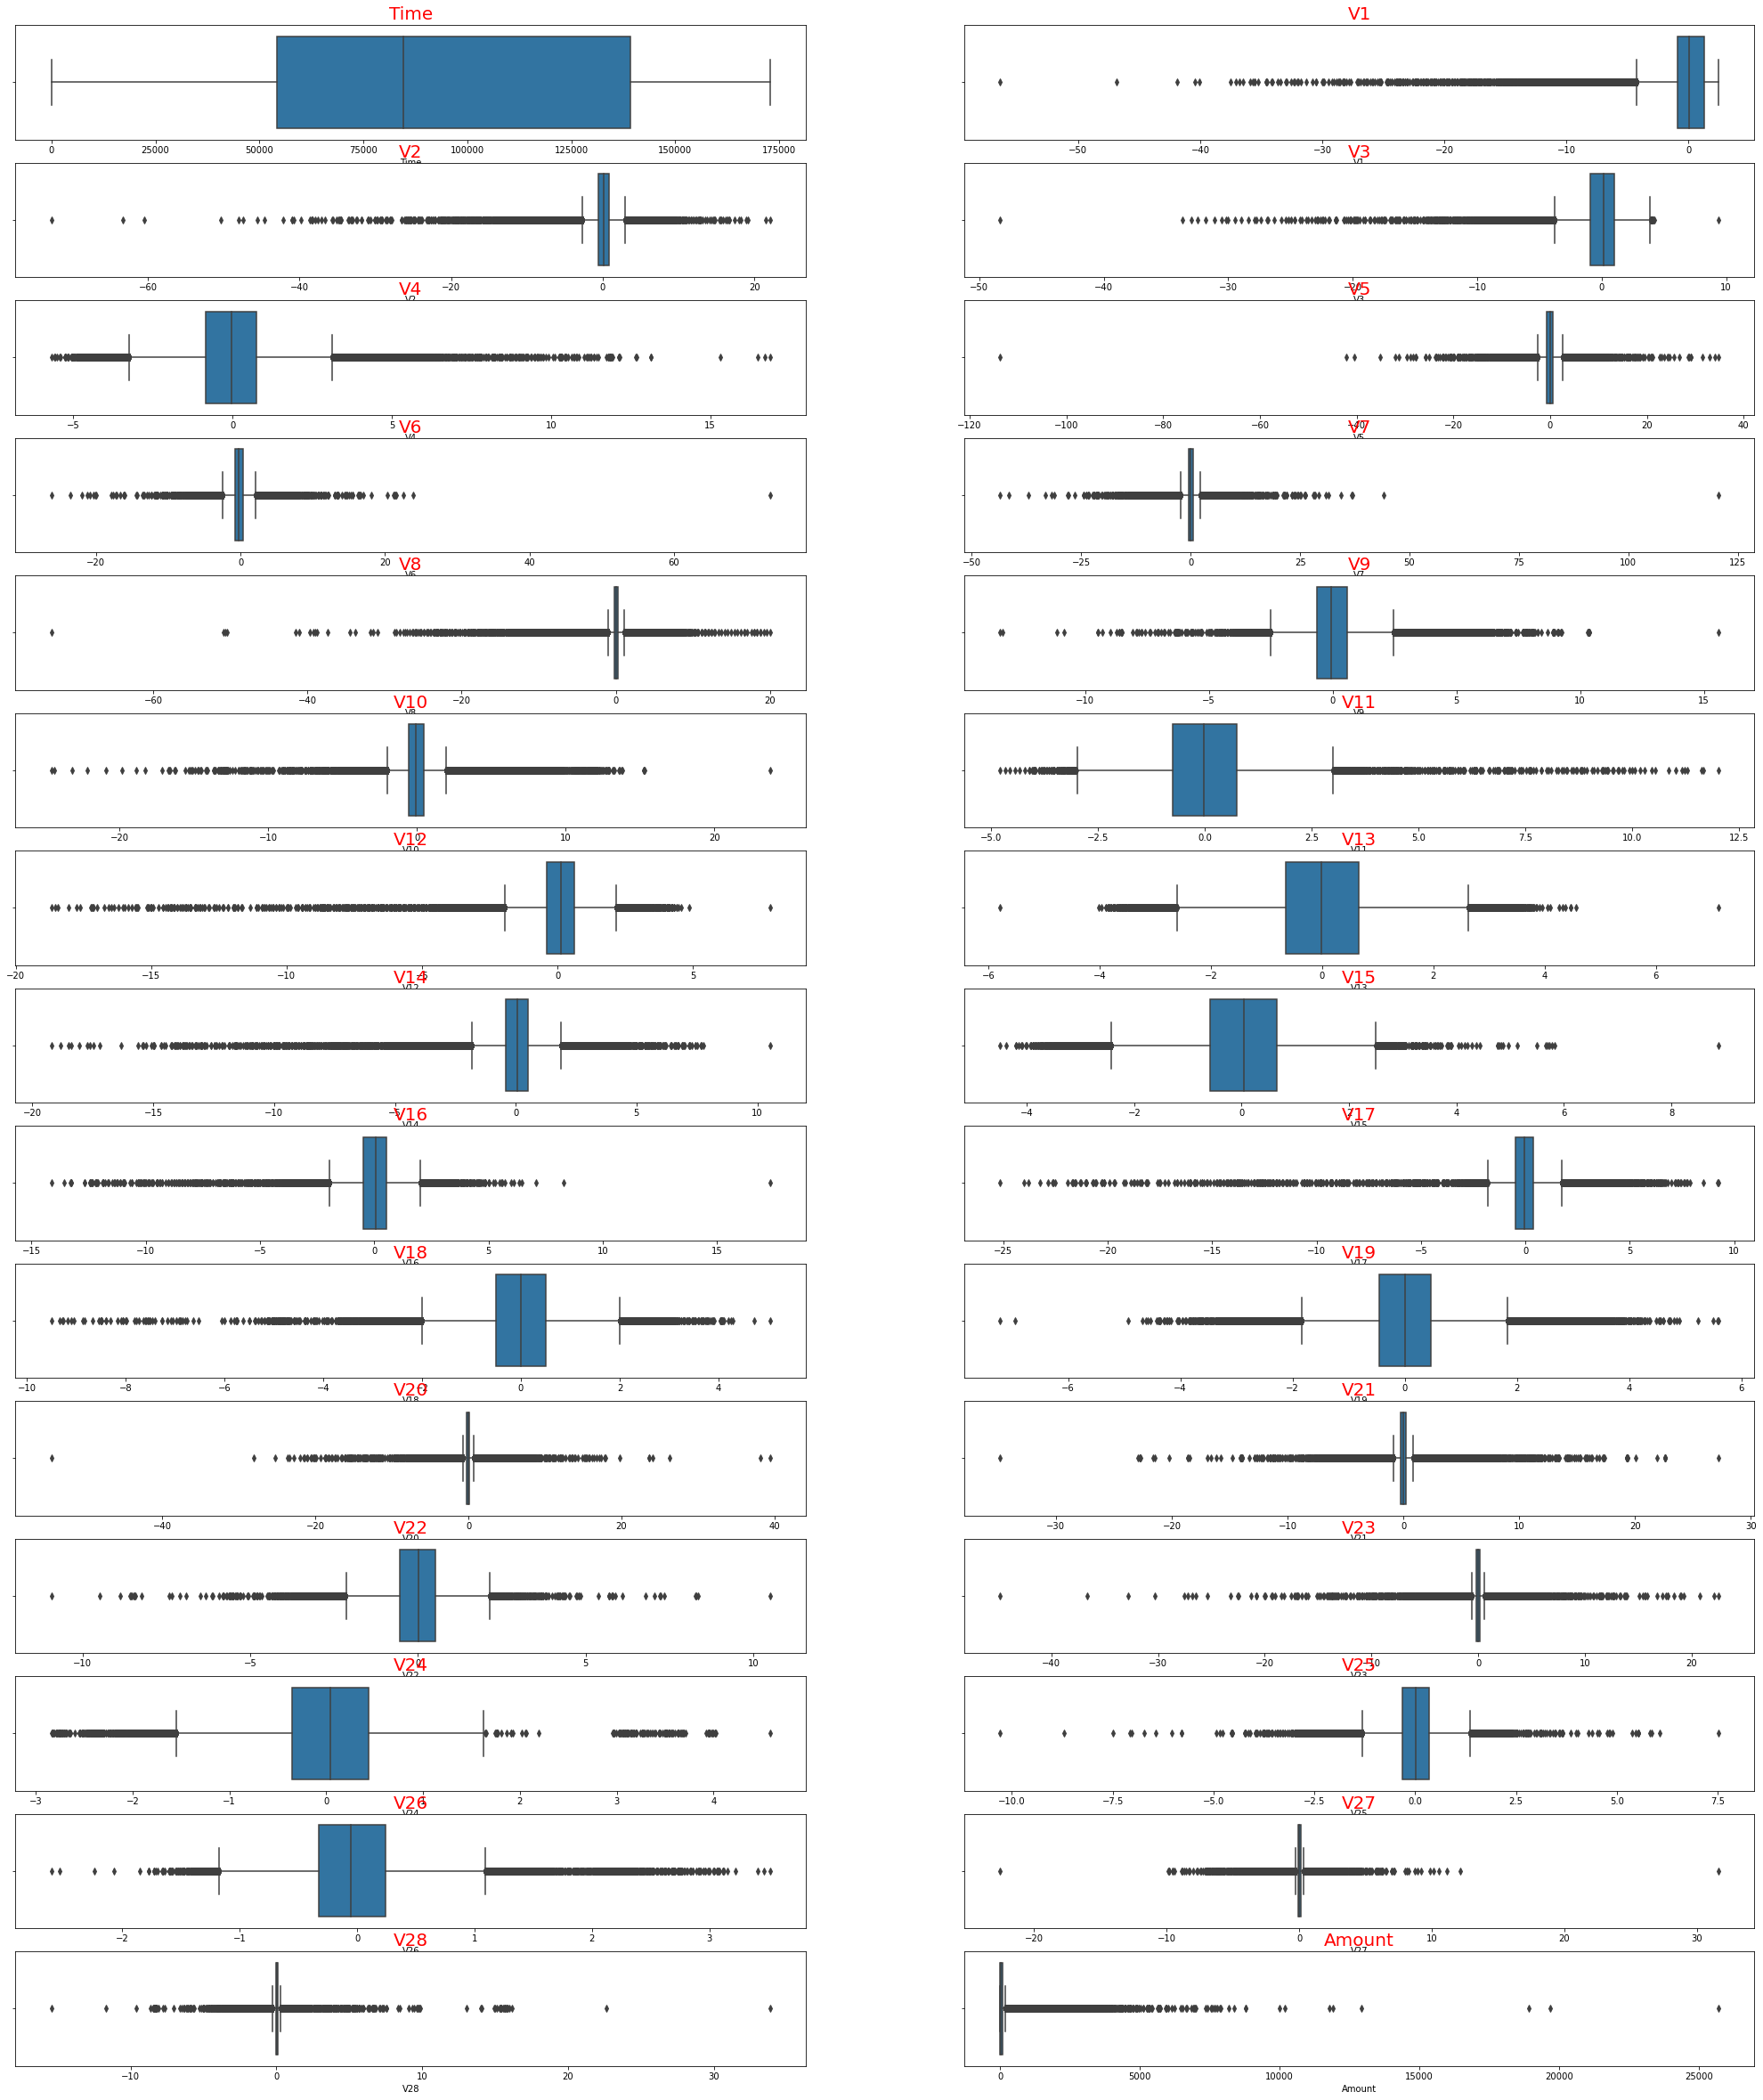

In [21]:
#Validate outliers in dataset
vars1= df.columns[:-1]
plt.figure(figsize=(35,45))
for i in range(len(vars1)):
    plt.subplot(16,2,i+1)
#     plt.hist(df[vars1[i]],bins=100)
    sns.boxplot(df[vars1[i]])
    plt.title(vars1[i], fontdict={'fontsize':20,'fontweight':15,'color':'red'},loc='center')

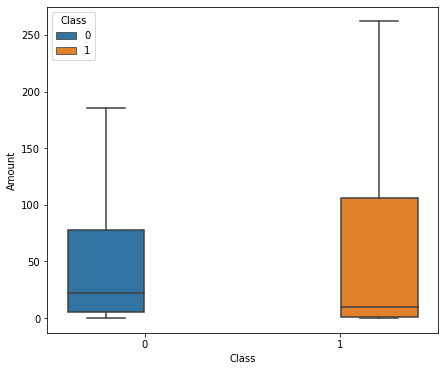

In [22]:
# Box Plot of amount for both classes
plt.figure(figsize = (7, 6))
a=sns.boxplot(x = 'Class', y = 'Amount',hue='Class', data = df,showfliers=False) 
plt.setp(a.get_xticklabels(), rotation=360)
plt.show()

### The distribution of amount for Fraud transactions is much higher than non-fradualent transactions. And there are couple who made very high expenses, thats why there mean is low but huge diff exists in between 75 percentile and mean

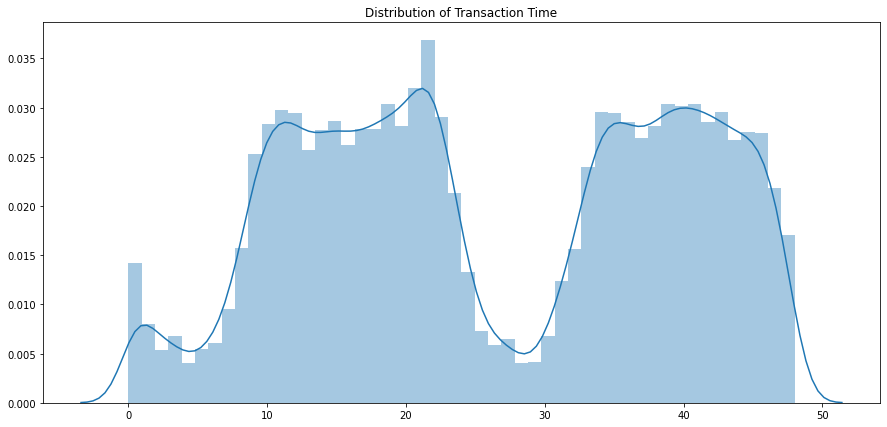

In [23]:
# Time Distribution plot for transactions 
plt.figure(figsize=(15,7))

plt.title('Distribution of Transaction Time')
sns.distplot(df['Time'].values/(60*60))
plt.show()

In [24]:
#Drop Time
df.drop('Time',inplace=True, axis=1)

# 6. Train-test Split 

In [25]:
# Create Train and Test Sets
y = df.Class
X = df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=100)

In [26]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (198608, 29), y_train: (198608,)
_______________________________________________________
TESTING: X_test: (85118, 29), y_test: (85118,)


In [27]:
print(y_train.value_counts())
y_train.value_counts(normalize=True).reset_index()

0    198277
1       331
Name: Class, dtype: int64


,index,Class
0,0,0.998333
1,1,0.001667


### Data imbalance still persist, so it has to be dealt as class-imbalance problem 

# 7. Feature Engineering

In [28]:
#Feature Scaling - Outliers Treatment
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
# X_validate = sc.transform(X_validate)
X_test = sc.transform(X_test)

MinMax scaler will make the value in between 0 and 1, so it will remove all outliers better than Standard Scaler

In [29]:
#Verify sampled data
Scaled_data = pd.DataFrame(X_train)
Scaled_data.describe(percentiles = [0.25,0.5,0.75,0.9,0.95,.99])

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
count,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,...,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000
mean,0.958456,0.772043,0.882837,0.248994,0.502780,0.548258,0.529516,0.785370,0.563786,0.614151,...,0.423576,0.561463,0.474998,0.669850,0.413646,0.577970,0.425417,0.483801,0.203679,0.004636
std,0.033026,0.017383,0.041694,0.062977,0.019417,0.027781,0.015301,0.012705,0.046079,0.027185,...,0.011371,0.011628,0.036132,0.009384,0.088284,0.029277,0.078791,0.019033,0.007696,0.012477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.942786,0.765697,0.858018,0.211285,0.492869,0.532218,0.522494,0.783145,0.536789,0.600689,...,0.420372,0.557802,0.447867,0.667436,0.361947,0.560089,0.371919,0.480268,0.202421,0.000304
50%,0.958671,0.772740,0.887784,0.248150,0.501950,0.542524,0.530060,0.785620,0.561654,0.611804,...,0.422624,0.561013,0.475373,0.669685,0.419623,0.578891,0.416864,0.483805,0.203931,0.001179
75%,0.980692,0.780540,0.911270,0.282123,0.511461,0.556616,0.536791,0.788861,0.588828,0.625637,...,0.425581,0.564486,0.501335,0.672059,0.477746,0.597680,0.464626,0.488187,0.205500,0.004120
90%,0.992590,0.786103,0.929328,0.314938,0.522828,0.579785,0.542772,0.793572,0.618465,0.642406,...,0.430324,0.567543,0.520649,0.674929,0.516499,0.611673,0.538124,0.496749,0.207899,0.010727
95%,0.993707,0.791144,0.939994,0.362975,0.532705,0.614496,0.547429,0.796529,0.638730,0.653146,...,0.436216,0.570115,0.531275,0.677149,0.540510,0.620526,0.576273,0.502788,0.209681,0.019171
99%,0.996341,0.812187,0.958343,0.438112,0.551958,0.636353,0.563372,0.807489,0.689797,0.695378,...,0.459600,0.592233,0.551493,0.692242,0.568641,0.645540,0.614728,0.529293,0.216379,0.053099


### Huge differnce between 99 percentile and max is reduced, outliers diminished 

# 8. Model Build - Handling Imbalanced Classes

### Target Variable, Class is a categorical variable. Linear regression is not suitable for this case. 

## Logistic Regression - Base

In [30]:
len(X_test)

85118

In [31]:
f1scores_dict={}
scores_dict={}
rScore_dict={}

lreg = LogisticRegression()
model = lreg.fit(X_train, y_train)

y_train_pred = lreg.predict(X_train)
y_test_pred = lreg.predict(X_test)

In [32]:
len(y_test_pred)

85118

In [33]:
f1scores_dict['LogisticReg'] = { 
                    'Train' : round(f1_score(y_train,y_train_pred),4),
                    'Test' : round(f1_score(y_test,y_test_pred.round()),4)
               } 

In [34]:
scores_dict['LogisticReg'] ={ 
              'Accuracy' : round(accuracy_score(y_test,y_test_pred),4),
               'Precision' : round(precision_score(y_test,y_test_pred),4),
               'Recall' : round(recall_score(y_test,y_test_pred),4)
             }

In [35]:
rScore_dict['LogisticReg'] = {
    'R_Square' : round(r2_score(y_test,y_test_pred),4)
}

In [36]:
print ('Accuracy: ', accuracy_score(y_test, y_test_pred))
print ('F1 score: ', f1_score(y_test, y_test_pred))
print ('Recall: ', recall_score(y_test, y_test_pred))
print ('Precision: ', precision_score(y_test, y_test_pred))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred))
print('\n R_Square score:\n',r2_score(y_test, y_test_pred)) 

Accuracy:  0.9990013863107686
F1 score:  0.6255506607929515
Recall:  0.5
Precision:  0.8352941176470589

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.84      0.50      0.63       142

    accuracy                           1.00     85118
   macro avg       0.92      0.75      0.81     85118
weighted avg       1.00      1.00      1.00     85118


 confussion matrix:
 [[84962    14]
 [   71    71]]

 R_Square score:
 0.40040816827153825


In [37]:
#ROC Curve
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="ROC with Area Under the curve ="+"{:.5f}".format(auc))
    plt.legend(loc=4)
    plt.show()
    pass

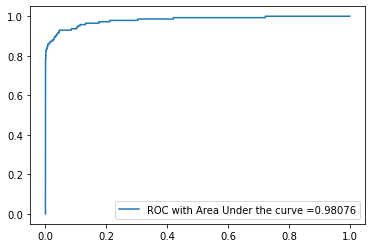

In [38]:
generate_auc_roc_curve(lreg,X_test)

In [39]:
f1scores_dict

{'LogisticReg': {'Train': 0.6554, 'Test': 0.6256}}

In [40]:
#Fraud Count
catch_cnt = 1
notCatch_cnt = 0
for n in y_test_pred:
    if n == 1:
        catch_cnt = catch_cnt + 1
    else:
        notCatch_cnt = notCatch_cnt +1 
print('Fruad Predict Count : ',catch_cnt)   
print('Not Fraud Predict Count : ',notCatch_cnt)

Fruad Predict Count :  86
Not Fraud Predict Count :  85033


##  Random Under-Sampling


1. Randomly remove majority class observations
2. Help to balance the dataset
3. Discarded observations could have important information
4. May lead to bias

In [41]:
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

662

In [42]:
#Total sample distributed
print(sorted(Counter(y_resampled_us).items()))

[(0, 331), (1, 331)]


In [43]:
lreg_us = LogisticRegression()
lreg_us.fit(X_resampled_us, y_resampled_us)

y_train_pred_us = lreg_us.predict(X_train)
y_test_pred_us = lreg_us.predict(X_test)

In [44]:
f1scores_dict['Random_US'] = { 
                   'Train' : round(f1_score(y_train,y_train_pred_us),4),
                   'Test' : round(f1_score(y_test,y_test_pred_us),4)
               } 

In [45]:
scores_dict['Random_US'] = {
              'Accuracy' : round(accuracy_score(y_test,y_test_pred),4),
               'Precision' : round(precision_score(y_test,y_test_pred),4),
               'Recall' : round(recall_score(y_test,y_test_pred),4)
             }

In [46]:
rScore_dict['Random_US'] = {
            'R_Square' : round(r2_score(y_test,y_test_pred),4)
}

In [47]:
#Fraud Count
catch_cnt = 1
notCatch_cnt = 0
for n in y_test_pred_us:
    if n == 1:
        catch_cnt = catch_cnt + 1
    else:
        notCatch_cnt = notCatch_cnt +1 
print('Fruad Predict Count : ',catch_cnt)   
print('Not Fraud Predict Count : ',notCatch_cnt) 

Fruad Predict Count :  305
Not Fraud Predict Count :  84814


In [48]:
f1scores_dict

{'LogisticReg': {'Train': 0.6554, 'Test': 0.6256},
 'Random_US': {'Train': 0.5545, 'Test': 0.5157}}

## Random Over-Sampling

1. Randomly add more minority observations by replication
2. No information loss
3. Prone to overfitting due to copying same information

In [49]:
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

396554

In [50]:
print(sorted(Counter(y_resampled_os).items()))

[(0, 198277), (1, 198277)]


In [51]:
lreg_os = LogisticRegression()
lreg_os.fit(X_resampled_os, y_resampled_os)

y_pred_os = lreg_os.predict(X_test)
y_train_os = lreg_os.predict(X_train)

In [52]:
f1scores_dict['Random OverSampling'] = { 
                    'Train' : round(f1_score(y_train,y_train_os),4),
                    'Test' : round(f1_score(y_test,y_pred_os),4)
                   }

In [53]:
scores_dict['Random OverSampling'] ={ 
               'Accuracy' : round(accuracy_score(y_test,y_pred_os),4),
               'Precision' : round(precision_score(y_test,y_pred_os),4),
               'Recall' : round(recall_score(y_test,y_pred_os),4)
             }

In [54]:
rScore_dict['Random OverSampling'] = {
            'R_Square' : round(r2_score(y_test,y_pred_os),4)
}

In [55]:
#Fraud Count
catch_cnt = 1
notCatch_cnt = 0
for n in y_pred_os:
    if n == 1:
        catch_cnt = catch_cnt + 1
    else:
        notCatch_cnt = notCatch_cnt +1 
print('Fruad Predict Count : ',catch_cnt)   
print('Not Fraud Predict Count : ',notCatch_cnt) 

Fruad Predict Count :  1997
Not Fraud Predict Count :  83122


In [56]:
f1scores_dict

{'LogisticReg': {'Train': 0.6554, 'Test': 0.6256},
 'Random_US': {'Train': 0.5545, 'Test': 0.5157},
 'Random OverSampling': {'Train': 0.1219, 'Test': 0.1169}}

## SMOTE - Synthetic Minority Oversampling Technique Creates new "Synthetic" observations

Process: - 
1. Identify the feature vector and its nearest neighbour
2. Take the difference between the two
3. Multiply the difference with a random number between 0 and 1
4. Identify a new point on the line segment by adding the random number to feature vector
5. Repeat the process for identified feature vectors

In [57]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

396554

In [58]:
print(sorted(Counter(y_resampled_smt).items()))

[(0, 198277), (1, 198277)]


In [59]:
lreg_smt = LogisticRegression()
lreg_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_train = lreg_smt.predict(X_train)
y_pred_smt = lreg_smt.predict(X_test)

In [60]:
f1scores_dict['SMOTE OverSampling'] = { 
                         'Train' : round(f1_score(y_train,y_pred_train),4),
                         'Test' : round(f1_score(y_test,y_pred_smt),4)
               } 

In [61]:
scores_dict['SMOTE OverSampling'] ={ 
               'Accuracy' : round(accuracy_score(y_test,y_pred_smt),4),
               'Precision' : round(precision_score(y_test,y_pred_smt),4),
               'Recall' : round(recall_score(y_test,y_pred_smt),4)
             }

In [62]:
rScore_dict['SMOTE OverSampling'] = {
            'R_Square' : round(r2_score(y_test,y_pred_smt),4)
}

In [63]:
f1scores_dict

{'LogisticReg': {'Train': 0.6554, 'Test': 0.6256},
 'Random_US': {'Train': 0.5545, 'Test': 0.5157},
 'Random OverSampling': {'Train': 0.1219, 'Test': 0.1169},
 'SMOTE OverSampling': {'Train': 0.1197, 'Test': 0.1155}}

In [64]:
rScore_dict

{'LogisticReg': {'R_Square': 0.4004},
 'Random_US': {'R_Square': 0.4004},
 'Random OverSampling': {'R_Square': -12.318},
 'SMOTE OverSampling': {'R_Square': -12.6072}}

In [65]:
#Fraud Count
catch_cnt = 1
notCatch_cnt = 0
for n in y_pred_os:
    if n == 1:
        catch_cnt = catch_cnt + 1
    else:
        notCatch_cnt = notCatch_cnt +1 
print('Fruad Predict Count : ',catch_cnt)   
print('Not Fraud Predict Count : ',notCatch_cnt) 

Fruad Predict Count :  1997
Not Fraud Predict Count :  83122


## Decision Tree - The number of data point s are more here, so it`s better to go for ensemble of decision Tree

## Random Forest 

In [159]:
rf = RandomForestClassifier(n_estimators=65,oob_score=False,n_jobs=-1,class_weight="balanced",random_state=100)

In [160]:
y = df.Class
X = df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=65, n_jobs=-1,
                       random_state=100)

In [161]:
y_train_rf = rf.predict(X_train)
y_test_rf = rf.predict(X_test)

In [162]:
f1scores_dict['Random Forest'] = { 
                     'Train' : round(f1_score(y_train,y_train_rf),4),
                     'Test' : round(f1_score(y_test,y_test_rf),4)
               } 

In [163]:
scores_dict['Random Forest'] ={  
               'Accuracy' : round(accuracy_score(y_test,y_test_rf),4),
               'Precision' : round(precision_score(y_test,y_test_rf),4),
               'Recall' : round(recall_score(y_test,y_test_rf),4)
             }

In [164]:
rScore_dict['Random Forest'] = {
            'R_Square' : round(r2_score(y_test,y_test_rf),4)
}

In [165]:
f1scores_dict

{'LogisticReg': {'Train': 0.6554, 'Test': 0.6256},
 'Random_US': {'Train': 0.5545, 'Test': 0.5157},
 'Random OverSampling': {'Train': 0.1219, 'Test': 0.1169},
 'SMOTE OverSampling': {'Train': 0.1197, 'Test': 0.1155},
 'Random Forest': {'Train': 1.0, 'Test': 0.8446},
 'XGBoost': {'Train': 1.0, 'Test': 0.84}}

In [167]:
#Fraud Count
catch_cnt = 1
notCatch_cnt = 0
for n in y_test_rf:
    if n == 1:
        catch_cnt = catch_cnt + 1
    else:
        notCatch_cnt = notCatch_cnt +1 
print('Fruad Predict Count : ',catch_cnt)   
print('Not Fraud Predict Count : ',notCatch_cnt) 

Fruad Predict Count :  110
Not Fraud Predict Count :  85009


## Hyper-parameter tuning for the Random Forest

In [74]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [75]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

### GridSearch 

In [76]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [77]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: user 32.9 s, sys: 1.08 s, total: 34 s
Wall time: 1h 24min 29s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [78]:
y_train_rf = grid_search.predict(X_train)
y_test_rf = grid_search.predict(X_test)

In [79]:
grid_search.best_score_

0.9994713203899137

In [80]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

In [81]:
# f1scores_dict = { 
#     'Random Forest Grid Search': {'Train' : round(f1_score(y_train,y_train_rf),4),
#                             'Test' : round(f1_score(y_test,y_test_rf),4)
#                     },
#                } 

In [82]:
# scores_dict ={ 'Random Forest Grid Search': 
#               {'Accuracy' : round(accuracy_score(y_test,y_test_rf),4),
#                'Precision' : round(precision_score(y_test,y_test_rf),4),
#                'Recall' : round(recall_score(y_test,y_test_rf),4),
#                'R_Square' : round(r2_score(y_test,y_test_rf),4)
#                },
#              }

In [83]:
# rScore_dict['Random Forest'] = {
#             'R_Square' : round(r2_score(y_test,y_test_rf),4)
# }

In [84]:
imp_df = pd.DataFrame({
    "Varname": df.columns[:-1],
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
13,V14,0.207865
16,V17,0.164069
11,V12,0.113429
15,V16,0.104377
9,V10,0.065431
17,V18,0.051810
10,V11,0.041588
6,V7,0.039195
8,V9,0.038190
3,V4,0.028081


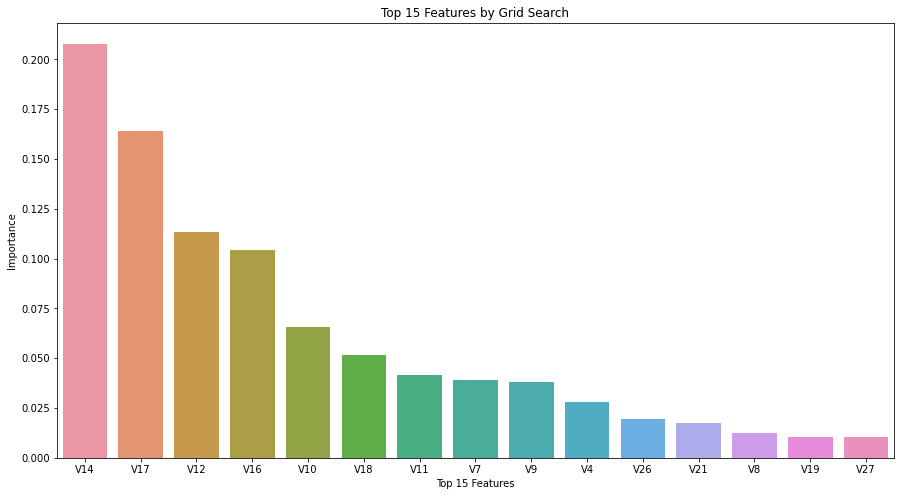

In [85]:
imp_df_best_GridSrch = imp_df.sort_values(by="Imp", ascending=False).head(15)

plt.figure(figsize=(15, 8))

ax = sns.barplot(x='Varname', y= 'Imp', data=imp_df_best_GridSrch)
ax.set(xlabel = 'Top 15 Features', ylabel = 'Importance')
plt.title('Top 15 Features by Grid Search')
plt.show()

# Random Forest with best value

In [168]:
rf = RandomForestClassifier(n_estimators=25,oob_score=False,n_jobs=-1,class_weight="balanced",random_state=42, max_depth=10, min_samples_leaf=5)

In [169]:
y = df.Class
X = df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, n_estimators=25, n_jobs=-1,
                       random_state=42)

In [170]:
y_train_rf = rf.predict(X_train)
y_test_rf = rf.predict(X_test)

In [171]:
scores_dict['Random Forest Best'] ={ 
               'Accuracy' : round(accuracy_score(y_test,y_test_rf),4),
               'Precision' : round(precision_score(y_test,y_test_rf),4),
               'Recall' : round(recall_score(y_test,y_test_rf),4)
             }

In [172]:
rScore_dict['Random Forest Best'] = {
            'R_Square' : round(r2_score(y_test,y_test_rf),4)
}

In [173]:
f1scores_dict['XGBoost'] = {
        'Train': round(f1_score(y_train,y_train_rf),4),
        'Test': round(f1_score(y_test, y_test_rf),4)
}

In [174]:
#Fraud Count
catch_cnt = 1
notCatch_cnt = 0
for n in y_test_rf:
    if n == 1:
        catch_cnt = catch_cnt + 1
    else:
        notCatch_cnt = notCatch_cnt +1 
print('Fruad Predict Count : ',catch_cnt)   
print('Not Fraud Predict Count : ',notCatch_cnt) 

Fruad Predict Count :  124
Not Fraud Predict Count :  84995


# XGBoost (Extreme Gradient Boosting)

In [93]:
y = df.Class
X = df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

In [94]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)


f1scores_dict['XGBoost'] = {
        'Train': round(f1_score(y_train,y_train_pred),4),
        'Test': round(f1_score(y_test, y_test_pred),4)
}

In [95]:
scores_dict['XGBoost'] ={ 
              'Accuracy' : round(accuracy_score(y_test,y_test_pred),4),
               'Precision' : round(precision_score(y_test,y_test_pred),4),
               'Recall' : round(recall_score(y_test,y_test_pred),4)
             }

In [96]:
rScore_dict['XGBoost'] = {
            'R_Square' : round(r2_score(y_test,y_test_pred),4)
}

In [97]:
#Fraud Count
catch_cnt = 1
notCatch_cnt = 0
for n in y_test_pred:
    if n == 1:
        catch_cnt = catch_cnt + 1
    else:
        notCatch_cnt = notCatch_cnt +1 
print('Fruad Predict Count : ',catch_cnt)   
print('Not Fraud Predict Count : ',notCatch_cnt) 

Fruad Predict Count :  109
Not Fraud Predict Count :  85010


# 9. Model Evaluation

In [98]:
scores_dict

{'LogisticReg': {'Accuracy': 0.999, 'Precision': 0.8353, 'Recall': 0.5},
 'Random_US': {'Accuracy': 0.999, 'Precision': 0.8353, 'Recall': 0.5},
 'Random OverSampling': {'Accuracy': 0.9778,
  'Precision': 0.0626,
  'Recall': 0.8803},
 'SMOTE OverSampling': {'Accuracy': 0.9773,
  'Precision': 0.0618,
  'Recall': 0.8873},
 'Random Forest': {'Accuracy': 0.9995, 'Precision': 0.9725, 'Recall': 0.7465},
 'Random Forest Best': {'Accuracy': 0.9994,
  'Precision': 0.8537,
  'Recall': 0.7394},
 'XGBoost': {'Accuracy': 0.9995, 'Precision': 0.9722, 'Recall': 0.7394}}

In [99]:
f1scores_dict

{'LogisticReg': {'Train': 0.6554, 'Test': 0.6256},
 'Random_US': {'Train': 0.5545, 'Test': 0.5157},
 'Random OverSampling': {'Train': 0.1219, 'Test': 0.1169},
 'SMOTE OverSampling': {'Train': 0.1197, 'Test': 0.1155},
 'Random Forest': {'Train': 1.0, 'Test': 0.8446},
 'XGBoost': {'Train': 1.0, 'Test': 0.84}}

In [100]:
rScore_dict

{'LogisticReg': {'R_Square': 0.4004},
 'Random_US': {'R_Square': 0.4004},
 'Random OverSampling': {'R_Square': -12.318},
 'SMOTE OverSampling': {'R_Square': -12.6072},
 'Random Forest': {'R_Square': 0.7249},
 'Random Forest Best': {'R_Square': 0.612},
 'XGBoost': {'R_Square': 0.7178}}

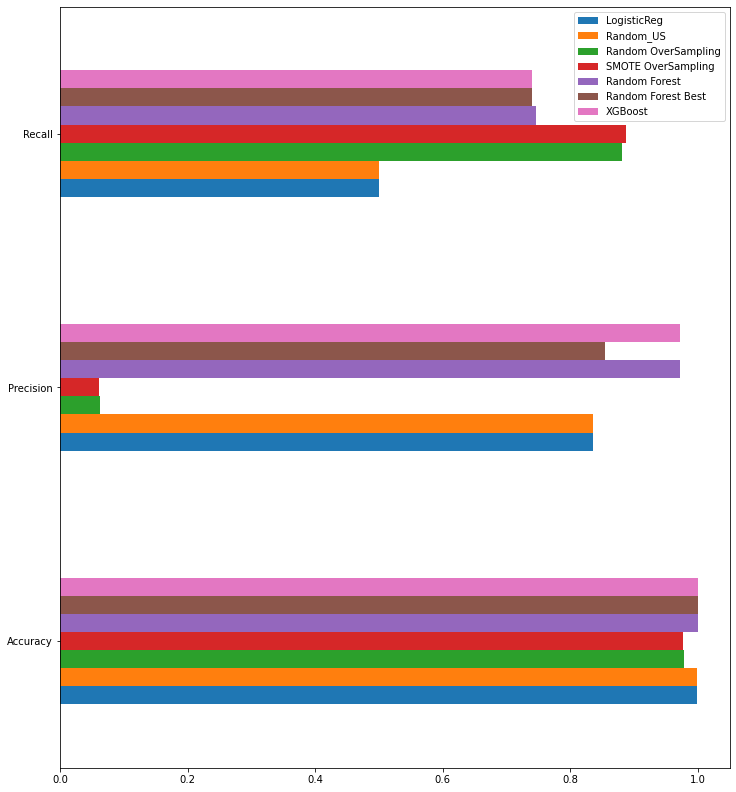

In [101]:
scores_df = pd.DataFrame(scores_dict)
scores_df.plot(kind='barh',figsize=(12,14))
plt.legend(loc="upper right")
plt.show()

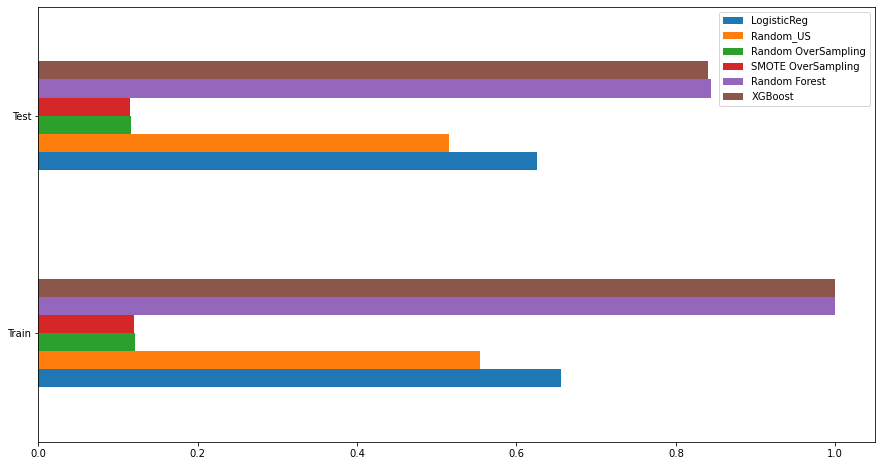

In [102]:
F1scores_df = pd.DataFrame(f1scores_dict)
F1scores_df.plot(kind='barh',figsize=(15,8))
plt.show()

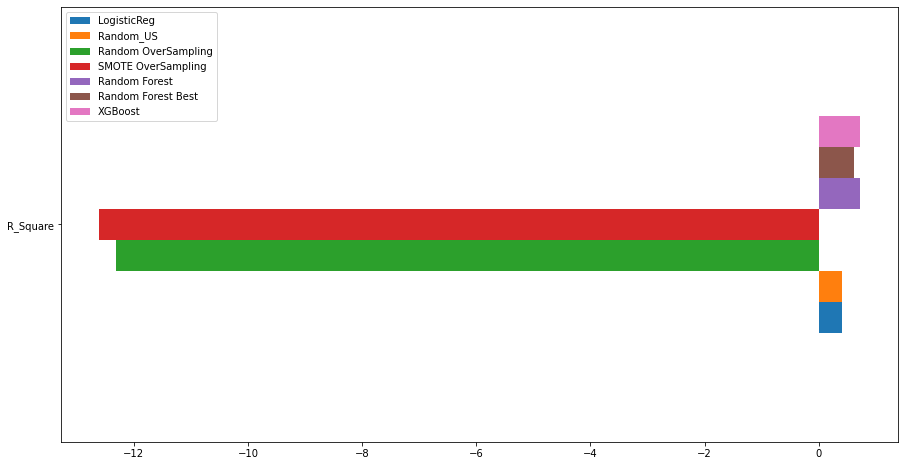

In [103]:
Rscores_df = pd.DataFrame(rScore_dict)
Rscores_df.plot(kind='barh',figsize=(15,8))
plt.show()

# Conclusion

Accuracy is the number of correct predictions made by the model by the total number of records.

Precision refers to the percentage of the results which are relevant.

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.

Here, the higher the recall is, the fewer false negatives means better picking rate for fraud.

Based on first graph, SMOTE, Random OS, Randome Forest, XG boost all er good although SMOTE and Random OS has very low Precision.

F1-score is used when the False Negatives and False Positives are crucial. Both of them are very imporatnt in farud detetction model. So, I emphasised more on it rather accuracy.

Based on second graph, Random Forest and XGBoost algo is better. Both have more than 80% score in test abd train data, so consistency remains on unseen data.

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model, R-squared explains to what extent the variance of one variable explains the variance of the second variable. 

Based on third graph, SMOTE and Random OS have -ive R-squared score, so these models have not captured variance well. Here also Random Forest and XGBoost is best.



## Comparing XGBoost and Random forest among all evaluation metrics, Random Forest has better recall score. So, I will make the model prection based on Random Forest Algoirthm. 

# 11. Cost Analysis

# Part I: Analyse the dataset and find the following figures:

1. Average number of transactions per month - 4272105.00

In [213]:
tran_2_days = 284807
avg_tran_month = (tran_2_days/2)*30
avg_tran_month

4272105.0

2. Average number of fraudulent transactions per month - 7380.00

In [214]:
avg_fraud_tran = (df_copy[df_copy.Class == 1].shape[0]/2)*30
avg_fraud_tran

7380.0

3. Average amount per fraudulent transaction - 8.1474

In [215]:
avg_fraud_amount = round(((df_copy[df_copy.Class == 1]['Amount'].sum())/((df_copy[df_copy.Class == 1].shape[0]/2)*30)),4)
avg_fraud_amount

8.1474

# Part II: Compare the cost incurred per month by the bank before and after the model deployment:

Cost incurred per month before the model was deployed = Average amount per fraudulent transaction * Average number of fraudulent transactions per month - 60127.812

In [216]:
cost_b4_model = avg_fraud_amount*avg_fraud_tran
cost_b4_model

60127.812

Let TF be the average number of transactions per month detected as fraudulent by the model and let the cost of providing customer executive support per fraudulent transaction detected by the model = $1.5

    Total cost of providing customer support per month for fraudulent transactions detected by the model = 1.5 * TF.

In [217]:
#Total cost of providing customer support per month for fraudulent transactions detected by the model --
TF = confusion_matrix(y_test, y_test_rf)[1][1]
cost_detect_fraud = TF*1.5
cost_detect_fraud

157.5

In [218]:
avg_fraud_tran_model = model_ds[model_ds.Class == 1].Amount.sum()/model_ds[model_ds.Class == 1].shape[0]
avg_fraud_tran_model

124.42959349593495

In [219]:
#Random Forest
confusion_matrix(y_test, y_test_rf)

array([[84958,    18],
       [   37,   105]])

In [220]:
FN = confusion_matrix(y_test, y_test_rf)[1][0]

In [221]:
#Cost incurred due to these fraudulent transactions left undetected by the model = Average amount per fraudulent transaction * FN
cost_undetect_fraud = avg_fraud_tran_model*FN
cost_undetect_fraud

4603.894959349594

In [226]:
#Therefore, the cost incurred per month after the model is built and deployed = 1.5*TF + Average amount per fraudulent transaction * FN

cost_built_after = cost_detect_fraud + cost_undetect_fraud
round(cost_built_after,4)

4761.395

In [225]:
#Final savings = Cost incurred before - Cost incurred after
final_save = cost_b4_model - cost_built_after
final_save

55366.417040650405